In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sa
from sklearn.metrics import mean_squared_error
import numpy as np

In [7]:
data = pd.read_csv('AirPassengers.csv')
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [9]:
data.describe

<bound method NDFrame.describe of        Month  #Passengers
0    1949-01          112
1    1949-02          118
2    1949-03          132
3    1949-04          129
4    1949-05          121
..       ...          ...
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432

[144 rows x 2 columns]>

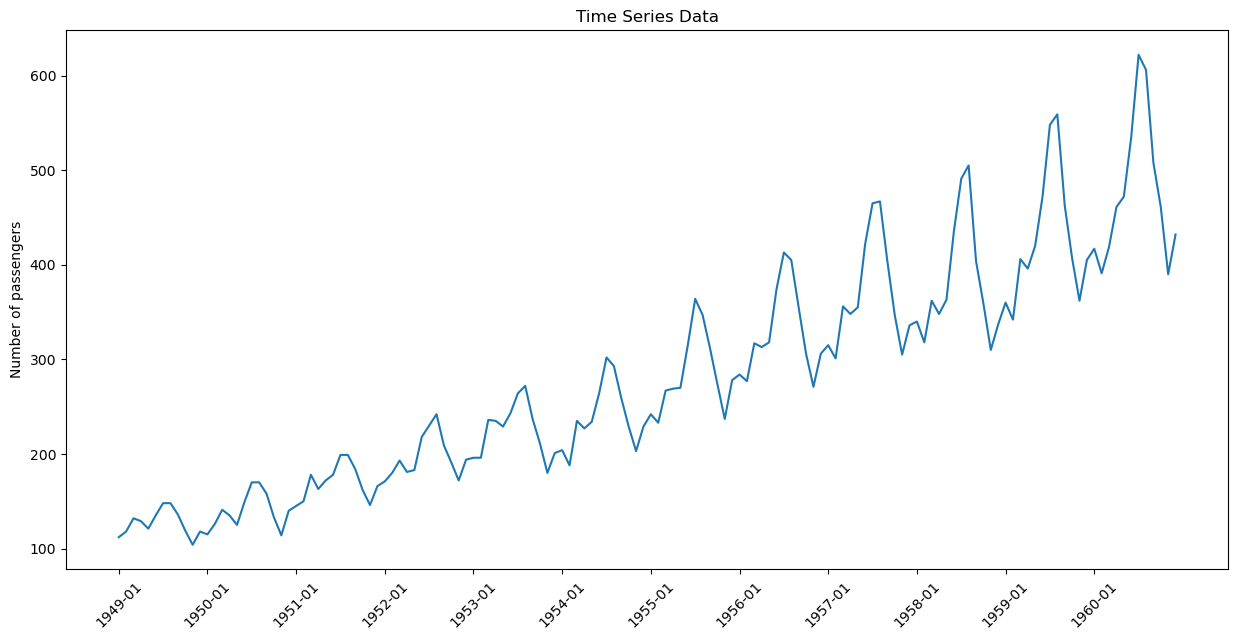

In [23]:
plt.figure(figsize=(15, 7))
plt.plot(data['Month'], data['#Passengers'])
#plt.xlabel('Date')
plt.ylabel('Number of passengers')
plt.title('Time Series Data')
plt.xticks(data['Month'][::12], rotation=45)
plt.show()

In [25]:
# Перетворюємо стовпець 'Month' у тип дати
data['Month'] = pd.to_datetime(data['Month'])
# Встановлюємо 'Month' як індекс даних
data.set_index('Month', inplace=True)

In [27]:
# Виконуємо декомпозицію часового ряду
decomposition = seasonal_decompose(data['#Passengers'], model='additive')
# Отримуємо тренд, сезонність та похибку
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

In [31]:
residual

Month
1949-01-01   NaN
1949-02-01   NaN
1949-03-01   NaN
1949-04-01   NaN
1949-05-01   NaN
              ..
1960-08-01   NaN
1960-09-01   NaN
1960-10-01   NaN
1960-11-01   NaN
1960-12-01   NaN
Name: resid, Length: 144, dtype: float64

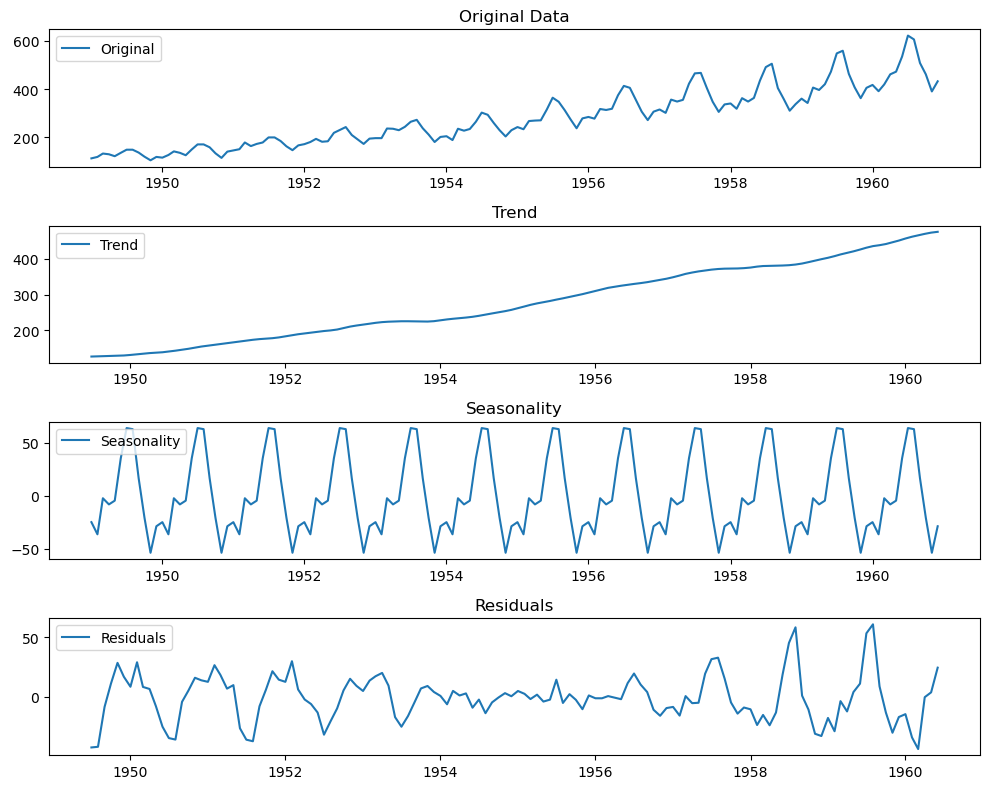

In [32]:
# Візуалізуємо оригінальний графік, тренд, сезонність та похибку
plt.figure(figsize=(10, 8))

plt.subplot(4, 1, 1)
plt.plot(data['#Passengers'], label='Original')
plt.legend(loc='best')
plt.title('Original Data')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.title('Seasonality')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.title('Residuals')

plt.tight_layout()
plt.show()

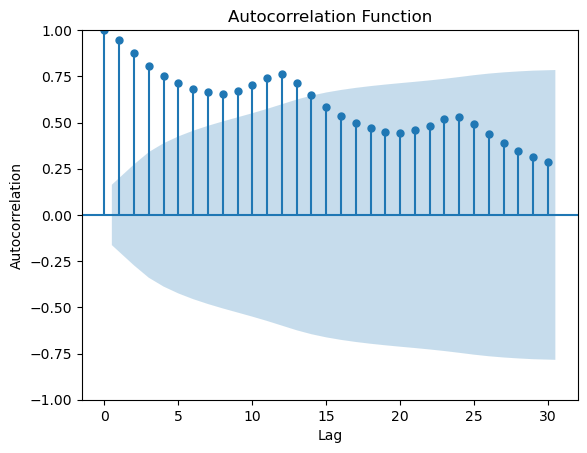

In [35]:
# Візуалізуємо автокореляційну функцію
plot_acf(data['#Passengers'], lags=30)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function')
plt.show()

In [40]:
# Розрахуэмо автокореляцію
acf_value = acf(data)
acf_value

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

In [42]:
# Розрахуэмо часткову автокореляцію
pacf_value = pacf(data, nlags =3)
pacf_value

array([ 1.        ,  0.95467704, -0.26527732,  0.05546955])

In [56]:
# Прогноз за допомогою Аріма 
src_data_model = data[:100]
model = sa.tsa.ARIMA(src_data_model).fit()
pred = model.predict(100,143, typ = 'levels')

C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='Month'>

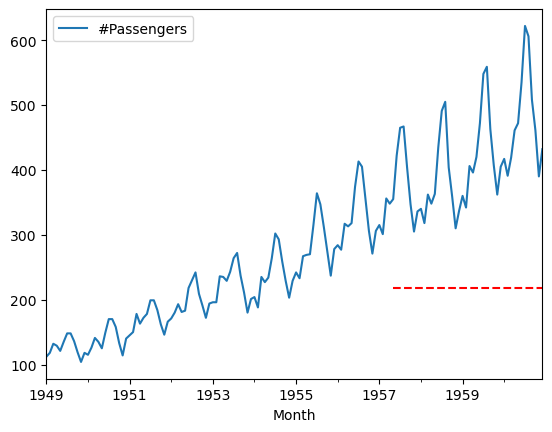

In [59]:
# Візуалізація результату роботи моделі ARIMA
data.plot()
pred.plot(style='r--')

In [99]:
# Оцінка моделі ARIMA
actual = data['#Passengers']
value = pred[0]
predicted = np.full((144, 1), value)
rmse = np.sqrt(mean_squared_error(actual, predicted))
print("RMSE:", rmse)

RMSE: 134.64161859746844


In [119]:
# Реалізація моделі SARIMAX
model1 = sa.tsa.statespace.SARIMAX(src_data_model, seasonal_order=(2,2,2,12)).fit()
pred2 = model1.predict(100,143, typ = 'levels')

C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<AxesSubplot:xlabel='Month'>

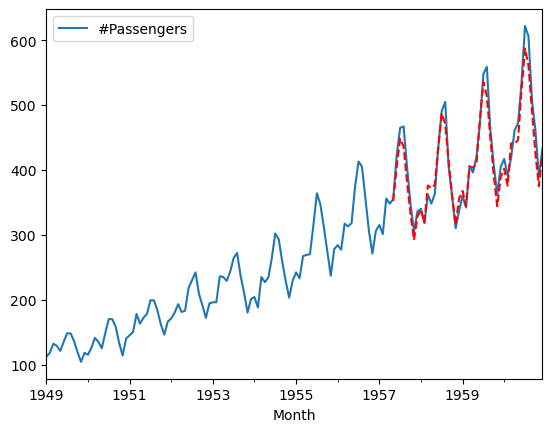

In [120]:
# Візуалізація результату роботи моделі SARIMAX
data.plot()
pred2.plot(style='r--')

In [122]:
# Оцінка моделі SARIMAX
actual1 = data['#Passengers']
value1 = pred2[0]
predicted1 = np.full((144, 1), value1)
rmse = np.sqrt(mean_squared_error(actual1, predicted1))
print("RMSE:", rmse)

RMSE: 139.39075421118514
